<a href="https://colab.research.google.com/github/mio-mio/CTF-CIT-Writeups/blob/main/Steganography/sw0906.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sw0906

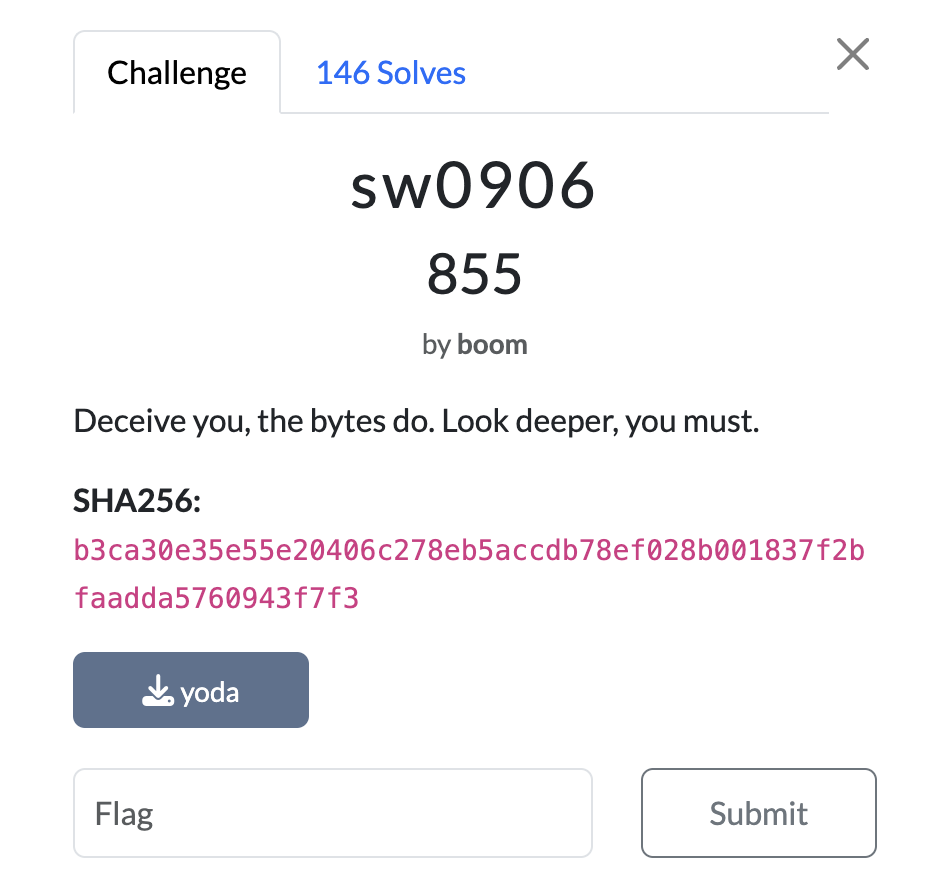

## Challenge Overview
**Title:** sw0906  
**Category:** Steganography

## Description
> Deceive you, the bytes do. Look deeper, you must.

Provided data: `yoda`


---

## Initial Analysis
- The filename was simply `yoda`, without any extension.
- Used the `file yoda` command:
  - Result: Unrecognized file type (data)
- Searched "sw0906" on Google and found a LEGO Yoda Minifigure.


## Attempts and Progress
- Applied `binwalk`, `zsteg`, `xxd`, `strings`, and other basic file analysis tools.
  - No useful information found.
- Used `hexdump -C yoda | less` to manually inspect the binary structure.
- Used `xxd yoda | grep ffd9`, I successfully found the FFD9 marker (the JPEG end-of-image marker) at byte offset 00055540.
- Based on this, I assumed that the actual data might extend from the beginning of the file up to around 0x55540, and attempted to split the file accordingly.
- Extracted a segment using `dd if=yoda of=extracted.jpg bs=1 count=$((0x55542))`, attempting to carve out potential embedded files.
- Used `tac yoda` to create a reversed version of the file (`yoda_reverse`) and also created an XOR variation to explore possible encoding.
- Searched for readable strings and inspected extracted content but found no clear clues.


## Solution

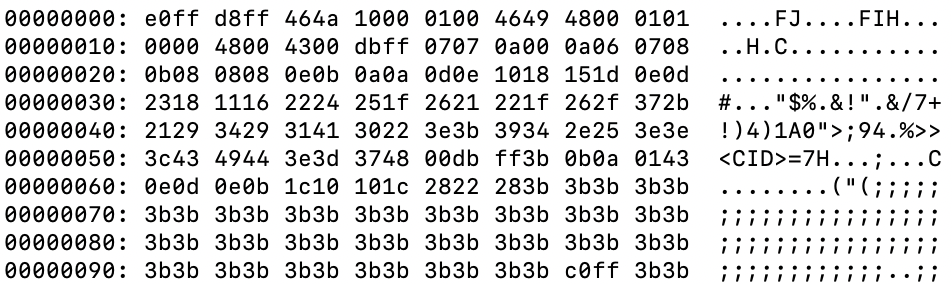


- While reviewing additional information, earned that the correct approach was to recognize that the entire file's bytes were written in reverse.
- Normally, a JPEG file begins with the signature `FF D8 FF E0 00 10 4A 46 49 46 00 01`.
- In this file, the hex view showed an abnormal pattern: it started with `E0 FF D8 FF` followed by `46 4A 10 00`, hinting that every byte was reversed.
- Reversing all bytes correctly with python script like below revealed the underlying JPEG image and the hidden flag.


In [ ]:
# Based on a solution shared by another solver. Adjusted for personal study and use.

def reverse_blocks(input_path, output_path):
    """
    Read a binary file, reverse each 4-byte block, and save the result to a new file.
    """
    with open(input_path, "rb") as f:
        data = f.read()

    fixed_data = bytearray()

    # Process each 4-byte block
    for i in range(0, len(data), 4):
        block = data[i:i+4]
        fixed_data.extend(block[::-1])  # Reverse the block

    with open(output_path, "wb") as f:
        f.write(fixed_data)

    print(f"Fixed file saved to: {output_path}")

# Example usage
reverse_blocks("yoda", "output_yoda.jpeg")



## Reflection
- This challenge made me realize the importance of being familiar with common file signatures (magic numbers) and being open to trying transformations like full reversal when encountering strange binary formats.